In [1]:
import pandas as pd
df = pd.read_csv("../Data/Cleaned_Data.csv")
df

,Balance,Balance_Frequency,Purchases,One_Off_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,One_Off_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,Cash_Advance_Trx,Purchases_Trx,Credit_Limit,Payments,Minimum_Payments,Prc_Full_Payment,Tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,0.000000,0.000000,6
8872,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8873,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8874,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_features = scaler.fit_transform(df)

In [3]:
from sklearn.cluster import KMeans

kmeans_params = {"init": "random", "n_init": 10, "max_iter": 350, "random_state": 42}

inertia_values = [
    KMeans(n_clusters=k, **kmeans_params).fit(scaled_features).inertia_
    for k in range(1, 11)
]

In [4]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 11), inertia_values, curve="convex", direction="decreasing")
elbow_point = k1.elbow
print(f"The optimal number of clusters is: {elbow_point}")

The optimal number of clusters is: 4


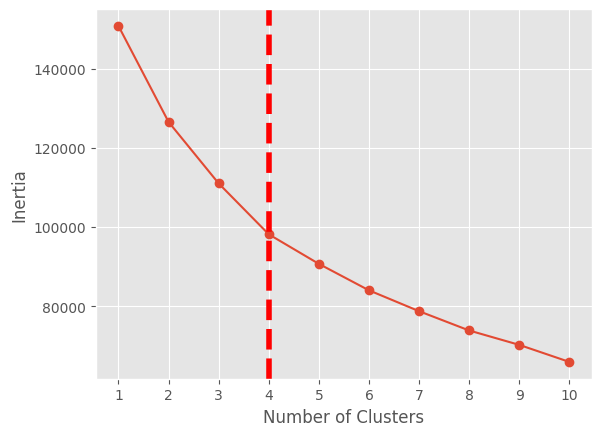

In [7]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot (range (1,11), inertia_values , marker = 'o')
plt.xticks (range (1, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
plt.axvline (x = elbow_point, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show ()

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 3)
kmeans = kmeans.fit (df)

centroids = kmeans.cluster_centers_
print (centroids)

clusters = kmeans.labels_
print (clusters)

[[3.38969636e+03 9.41969834e-01 1.58770734e+03 9.91445413e+02
  5.96573477e+02 2.09498563e+03 5.41457995e-01 3.18003654e-01
  3.86033463e-01 2.10086116e-01 5.72628372e+00 2.21940818e+01
  8.98929702e+03 2.86990622e+03 1.55005523e+03 1.35540175e-01
  1.17380331e+01]
 [8.64138364e+02 8.61944344e-01 6.06017136e+02 3.14261915e+02
  2.92057576e+02 4.99887353e+02 4.66832251e-01 1.55160161e-01
  3.50975252e-01 1.07827735e-01 2.27726920e+00 1.07010085e+01
  2.74254051e+03 9.98328585e+02 5.54392367e+02 1.58337258e-01
  1.14344453e+01]
 [4.83301557e+03 9.14620970e-01 1.05307798e+04 7.42990541e+03
  3.10103977e+03 5.43050951e+03 7.42298917e-01 5.86638699e-01
  5.97387970e-01 2.30828677e-01 9.25563910e+00 8.44135338e+01
  1.24890977e+04 1.79058694e+04 2.47407345e+03 3.29256820e-01
  1.18421053e+01]]
[1 0 0 ... 1 1 1]


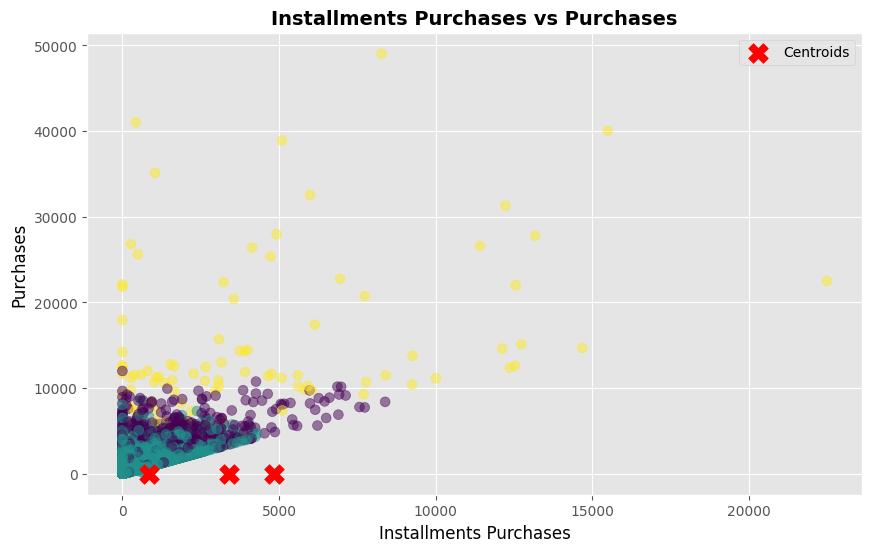

In [10]:
df_with_clusters = df.copy()

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df["Installments_Purchases"], df["Purchases"], 
                     c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker='X', label='Centroids')

ax.set_title("Installments Purchases vs Purchases", weight="bold", color="black", fontsize=14)
ax.set_xlabel("Installments Purchases", color="black", fontsize=12)
ax.set_ylabel("Purchases", color="black", fontsize=12)

ax.legend()
ax.grid(True)

plt.show()